# APPLE QUALITY PREDICTOR

In [7]:
# LOAD DATASET

#import os
#print(os.getcwd())

import pandas as pd
#path = r"C:\Users\moeez\Desktop\GitHub Repositories\apple_quality.csv"  # why path not working # also use url

apple_df = pd.read_csv("apple_quality.csv")

In [9]:
# GET OVERVIEW OF DATASET

apple_df.head(6)

# findings: data already labelled, cleaned(no missing values), no formatting issue, normalized

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad


In [10]:
# GET OVERVIEW OF DATASET

apple_df.dtypes

# findings: need to convert acidity into float, rest ok

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [18]:
# PRE-PROCESSING

# apple_df["Acidity"] = apple_df["Acidity"].astype("float64")     # didn't work as said there was a string in this column
# print(apple_df["Acidity"].unique)                               # found last value to be a string
# print(apple_df["Quality"])                                      # found last value to be NaN, so decided to remove last row, 
#                                                                 # otherwise would have replaced last acidity with mean?                                    

# row_index_to_drop = 4000
# apple_df.drop(row_index_to_drop, inplace=True)                  # would have dropped last row only, but need to remove any quality where NaN

apple_df = apple_df.dropna(subset=["Quality"], axis = 0)

print(apple_df["Acidity"],"\n\n")
print(apple_df["Quality"],"\n\n")

apple_df["Acidity"] = apple_df["Acidity"].astype("float64")

apple_df.dtypes

0      -0.491590
1      -0.722809
2       2.621636
3       0.790723
4       0.501984
          ...   
3995    0.137784
3996    1.854235
3997   -1.334611
3998   -2.229720
3999    1.599796
Name: Acidity, Length: 4000, dtype: float64 


0       good
1       good
2        bad
3       good
4       good
        ... 
3995     bad
3996    good
3997     bad
3998    good
3999    good
Name: Quality, Length: 4000, dtype: object 




A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [19]:
# finding unique target value

apple_df["Quality"].unique()

array(['good', 'bad'], dtype=object)

# Model: Logistic Regression

In [29]:
# have many continuous values, need to predict definite values so use logistic regression

# divide data into train and test sets

x = apple_df.drop(["A_id","Quality"],axis=1)    # rows=> axis=0,     columns=> axis=1
y = apple_df["Quality"]


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=4000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=4000, multi_class='multinomial')

accuracy is : 0.73 


Classification Report:
               precision    recall  f1-score   support

         bad       0.74      0.72      0.73       612
        good       0.71      0.74      0.73       588

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200
 




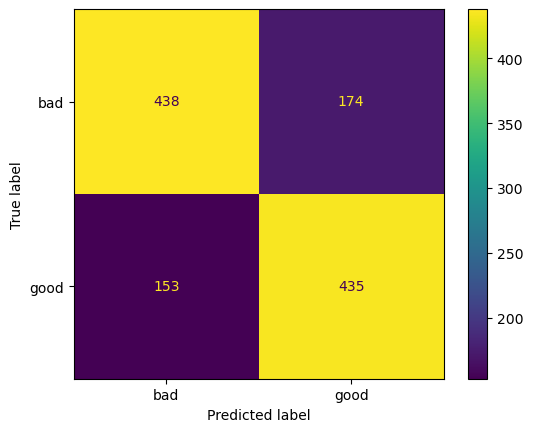

In [34]:
# applying model on test set

yhat = model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, yhat)
print(f"accuracy is : {accuracy:.2f}","\n\n")

print("Classification Report:\n", classification_report(y_test, yhat),"\n\n")

cm = confusion_matrix(y_test,yhat)
dl = model.classes_
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= dl)
cm_display.plot()

In [ ]:
# the logistic regression model is 73 percent accurate for both good and apple apples. not a very accurate model. lets try another model to improve prediction.

# Model: Random Forest Classifier

accuracy is : 0.87 


Classification Report:
               precision    recall  f1-score   support

         bad       0.89      0.86      0.87       612
        good       0.86      0.88      0.87       588

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200
 




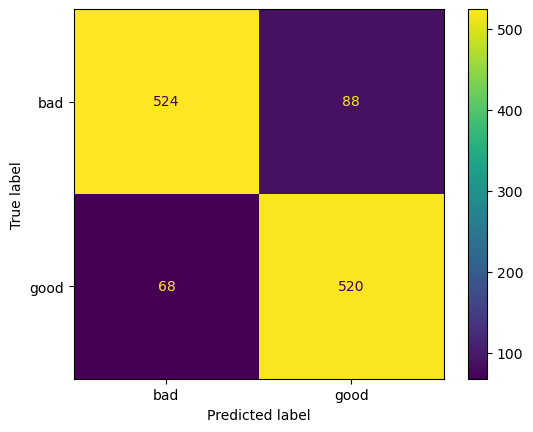

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model to the training data
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions
yhat_rf = rf_model.predict(x_test)



# applying model on test set

yhat_rf = rf_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, yhat_rf)
print(f"accuracy is : {accuracy:.2f}","\n\n")

print("Classification Report:\n", classification_report(y_test, yhat_rf),"\n\n")

cm = confusion_matrix(y_test,yhat_rf)
dl = rf_model.classes_
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= dl)
cm_display.plot()

In [ ]:
# random forest model much better than logistic regression model